In [38]:
%pylab
from scipy.integrate import odeint

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


h1 at equilibrium = 16.7076564038 m
h2 at equilibrium = 8.3538282019 m


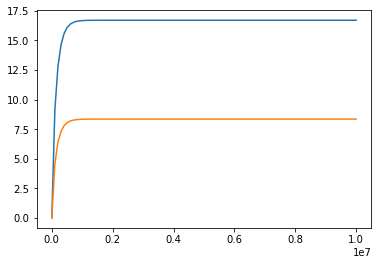

In [39]:
# 1. Derive the coupled ODEs that describe this system
########################
# D_h = small variation in waterlevel
#
#
#
#



# Define parameters
D_h1 = 1 #m
D_h2 = 1 #m
A_R1 = 5000. #m^2
A_R2 = 50. #m^2
L1 = 1000. #m
L2 = 1000.
f1 = 0.1 #unitless
f2 = 0.1
R = 1. #m^3/s
A_c1 = pi*(D_h1**2)/4.
A_c2 = pi*(D_h2**2)/4.

h=[0.,0.]

g=9.8 #m^2/s


# Question 1: Coupled equations

def dh_dt(F_h, tdummy, F_Ac1,F_Ac2, F_Dh1,F_Dh2, F_L1, F_L2, F_f1, F_f2, F_R, F_AR1, F_AR2):
    h1,h2 = F_h # what does this part do?
    Cf1 = 1. + F_f1*F_L1/F_Dh1
    Q1 = F_Ac1*sqrt(2.*g*(h1-h2)/Cf1)
    Cf2 = 1. + F_f2*F_L2/F_Dh2
    Q2 = F_Ac2*sqrt(2.*g*h2/Cf2)
    
    return ((R - Q1)/F_AR1, (Q1 - Q2)/F_AR2)



t = linspace(0,10000000,100)
resultat = odeint(dh_dt,h, t, args=(A_c1, A_c2, D_h1, D_h2, L1, L2, f1, f2, R, A_R1, A_R2))

h1_eq = resultat [-1,0]
h2_eq = resultat [-1,1]


plot(t,resultat[:,0])
plot(t,resultat[:,1])


print 'h1 at equilibrium =', h1_eq ,'m'
print 'h2 at equilibrium =', h2_eq ,'m'

Question 2: With the paramters given, the system reaches equilibrium when h1=16.7m and h2=8.4m when R=Q2

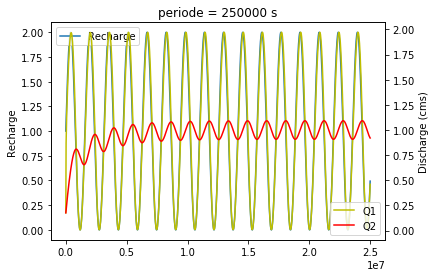

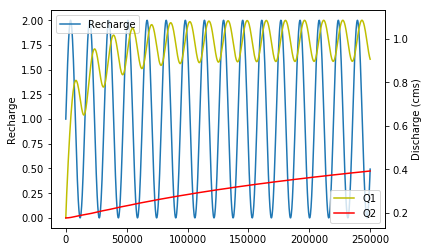

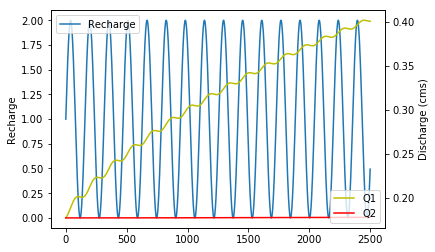

In [40]:
# Question 3: the recharge fluctuate

    
g=9.8 #m^2/s

# Define parameters
D_h1 = 0.5 #m
D_h2 = 0.5 #m
#A_R1 = 5000. #m^2
#A_R2 = 50. #m^2
A_R1 = 50. #m^2
A_R2 = 5000. #m^2
L1 = 1000. #m
L2 = 1000.
f1 = 0.1 #unitless
f2 = 0.1
# R = 1. #m^3/s
A_c1 = pi*(D_h1**2)/4.
A_c2 = pi*(D_h2**2)/4.

C_f1 = 1. + f1*L1/D_h1
C_f2 = 1. + f2*L2/D_h2

wa=4*10**-6 # /s
wb=4*10**-4 # /s
wc=4*10**-2 # /s

h=[0.,0.]
heq=[h1_eq,h2_eq]




def dh_dt_R(F_h, time, F_Ac1,F_Ac2, F_Cf1, F_Cf2, F_AR1, F_AR2, F_w):
    fh1,fh2 = F_h 
    fR_t = sin(F_w*time)+1.    
    fQ1 = F_Ac1*sqrt(2.*g*abs(fh1-fh2)/F_Cf1)
    fQ2 = F_Ac2*sqrt(2.*g*abs(fh2)/F_Cf2)
    
    return ((fR_t - fQ1)/F_AR1, (fQ1 - fQ2)/F_AR2)

#t = linspace(0,10000000,100000) # time at which we want the solution
Pa = 1./wa
Pb = 1./wb
Pc = 1./wc

# Define timestep
tstepa = 1000
tstepb = 1000
tstepc = 1000
ta = linspace(0,(100.*Pa),tstepa)
tb = linspace(0,(100.*Pb),tstepb)
tc = linspace(0,(100.*Pc),tstepc)


resultata = odeint(dh_dt_R, heq, ta, args=(A_c1,A_c2, C_f1, C_f2, A_R1, A_R2, wa))
resultatb = odeint(dh_dt_R, heq, tb, args=(A_c1,A_c2, C_f1, C_f2, A_R1, A_R2, wb))
resultatc = odeint(dh_dt_R, heq, tc, args=(A_c1,A_c2, C_f1, C_f2, A_R1, A_R2, wc))


h1a=resultata[:,0]
h2a=resultata[:,1]
h1b=resultatb[:,0]
h2b=resultatb[:,1]
h1c=resultatc[:,0]
h2c=resultatc[:,1]

Q1a = A_c1*sqrt(2.*g*abs(h1a-h2a)/C_f1)
Q2a = A_c2*sqrt(2.*g*abs(h2a)/C_f2)
Ra = sin(wa*ta)+1.

Q1b = A_c1*sqrt(2.*g*abs(h1b-h2b)/C_f1)
Q2b = A_c2*sqrt(2.*g*abs(h2b)/C_f2)
Rb = sin(wb*tb)+1.

Q1c = A_c1*sqrt(2.*g*abs(h1c-h2c)/C_f1)
Q2c = A_c2*sqrt(2.*g*abs(h2c)/C_f2)
Rc = sin(wc*tc)+1.

###############
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(ta, Ra, label = 'Recharge')
ax2.plot(ta, Q1a, label = "Q1", color='y')
ax2.plot(ta, Q2a, label = "Q2", color='r')


ax1.set_ylabel('Recharge')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Discharge (cms)')


ax1.legend(loc ='upper left')
ax2.legend(loc ='lower right')
title('periode = 250000 s')

#################
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(tb, Rb, label = 'Recharge')
ax2.plot(tb, Q1b, label = "Q1", color='y')
ax2.plot(tb, Q2b, label = "Q2", color='r')

ax1.set_ylabel('Recharge')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Discharge (cms)')

ax1.legend(loc ='upper left')
ax2.legend(loc ='lower right')

#################
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


ax1.plot(tc, Rc, label = 'Recharge')
ax2.plot(tc, Q1c, label = "Q1", color='y')
ax2.plot(tc, Q2c, label = "Q2", color='r')


ax1.set_ylabel('Recharge')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Discharge (cms)')

ax1.legend(loc ='upper left')
ax2.legend(loc ='lower right')

In [41]:
# The equilibrium takes the same time to be obtain, whatever the periode.


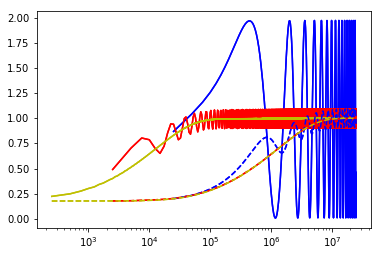

In [42]:
#t = linspace(0,10000000,100000) # time at which we want the solution
Pa = 1./wa
Pb = 1./wb
Pc = 1./wc

# Define timestep
tstepa = 1000
tstepb = 10000
tstepc = 100000
ta = linspace(0,(100.*Pa),tstepa)
tb = linspace(0,(10000.*Pb),tstepb)
tc = linspace(0,(1000000.*Pc),tstepc)


resultata = odeint(dh_dt_R, heq, ta, args=(A_c1,A_c2, C_f1, C_f2, A_R1, A_R2, wa))
resultatb = odeint(dh_dt_R, heq, tb, args=(A_c1,A_c2, C_f1, C_f2, A_R1, A_R2, wb))
resultatc = odeint(dh_dt_R, heq, tc, args=(A_c1,A_c2, C_f1, C_f2, A_R1, A_R2, wc))


h1a=resultata[:,0]
h2a=resultata[:,1]
h1b=resultatb[:,0]
h2b=resultatb[:,1]
h1c=resultatc[:,0]
h2c=resultatc[:,1]

Q1a = A_c1*sqrt(2.*g*abs(h1a-h2a)/C_f1)
Q2a = A_c2*sqrt(2.*g*abs(h2a)/C_f2)
Ra = sin(wa*ta)+1.

Q1b = A_c1*sqrt(2.*g*abs(h1b-h2b)/C_f1)
Q2b = A_c2*sqrt(2.*g*abs(h2b)/C_f2)
Rb = sin(wb*tb)+1.

Q1c = A_c1*sqrt(2.*g*abs(h1c-h2c)/C_f1)
Q2c = A_c2*sqrt(2.*g*abs(h2c)/C_f2)
Rc = sin(wc*tc)+1.



semilogx(ta,Q1a,'b')
semilogx(tb,Q1b,'r')
semilogx(tc,Q1c,'y')
semilogx(ta,Q2a,'--b')
semilogx(tb,Q2b,'--r')
semilogx(tc,Q2c,'--y')
show()

plot(ta,Q1a,'b')
plot(tb,Q1b,'r')
plot(tc,Q1c,'y')
plot(ta,Q2a,'--b')
plot(tb,Q2b,'--r')
plot(tc,Q2c,'--y')
show()